In [2]:
import numpy as np
import matplotlib.pyplot as plt

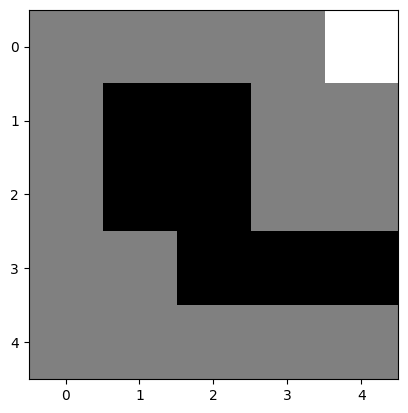

In [3]:
# solving car racing problem using monte carlo method reinforcement learning
# the car racing problem is a 5x5 grid, with the car starting at the bottom
# left corner, and the goal at the top right corner. The car can move up, down, left, or right 


# initialize the grid
grid = np.zeros((5,5))
# set the goal
grid[0,4] = 1
# set the starting position down in random row
# grid[4,np.random.randint(0,5)] = 2
# set walls
grid[1,1] = -1
grid[1,2] = -1
grid[2,1] = -1
grid[2,2] = -1
grid[3,2] = -1
grid[3,3] = -1
grid[3,4] = -1

# plot the grid
plt.imshow(grid, cmap='gray')
plt.show()

In [7]:
class race():
    def __init__(self, grid):
        self.grid = grid
        # three action 0, 1 -1 add to velocity of car in x and y direction
        # action space is 3x3 = 9
        # current state of car is down of the map with random x
        self.current_state = np.array([4, np.random.randint(0,5), 0, 0]) # x, y, vx, vy
        self.gridworld_size = (5,5)
        self.returns = {(i,j):list() for i in range(self.gridworld_size[0]) for j in range(self.gridworld_size[1])}
        self.action = np.array([0,0])
        self.reward = 0
        self.done = False
        self.gamma = 0.9
        self.alpha = 0.1
        self.epsilon = 0.1
        self.Q = np.zeros((5,5,3,3))
        self.policy = np.zeros((5,5))
        # save data from each episode reward and state
        self.episode_reward = []
        self.episode_state = []
        self.episode_action = []
        self.episode = 0

    def reset(self):
        # reset the car to the bottom left corner
        self.current_state = np.array([4, np.random.randint(0,5), 0, 0])
        self.done = False
        self.action = np.array([0,0])

    def get_action(self):
        # get the action from the policy
        # epsilon greedy policy
        if np.random.rand() < self.epsilon:
            self.action = np.array([np.random.randint(-1,2), np.random.randint(-1,2)])
        else:
            self.action = np.array([self.policy[self.current_state[0], self.current_state[1]], self.policy[self.current_state[0], self.current_state[1]]])
        # check velocity vj > 0 and vj , vi < 5
        if self.action[1] <= 0:
            self.action[1] = 1
        if self.action[1] == 0 and self.action[0] == 0:
            self.action[0] = 1
        print(self.action)

    def move(self):
        # move the car according to the action
        # update the velocity
        print(self.action)
        print(self.current_state)
        print(self.episode)
        self.current_state[2] += self.action[0]
        self.current_state[3] += self.action[1]
        # check if the car is out of bound
        if self.current_state[0] + self.current_state[2] < 0 or self.current_state[0] + self.current_state[2] > 4:
            self.current_state[2] = 0
        if self.current_state[1] + self.current_state[3] < 0 or self.current_state[1] + self.current_state[3] > 4:
            self.current_state[3] = 0
        # update the position
        self.current_state[0] += self.current_state[2]
        self.current_state[1] += self.current_state[3]
        # check if the car is in the goal
        if self.grid[self.current_state[0], self.current_state[1]] == 1:
            self.reward = 10
            self.done = True
        # check if the car hit the wall
        if self.grid[self.current_state[0], self.current_state[1]] == -1:
            self.reward = -10
            self.done = True
        else:
            self.reward = -1
        self.grid = np.zeros((5,5))
        # set the goal
        self.grid[0,4] = 1
        # set the starting position down in random row
        # grid[4,np.random.randint(0,5)] = 2
        # set walls
        self.grid[1,1] = -1
        self.grid[1,2] = -1
        self.grid[2,1] = -1
        self.grid[2,2] = -1
        self.grid[3,2] = 0
        self.grid[3,3] = 0
        self.grid[3,4] = 0
        self.grid[self.current_state[0], self.current_state[1]] = 3
        plt.imshow(self.grid, cmap='gray')
        plt.show()
    # run one episode
    def run(self):
        self.episode += 1
        self.reset()
        self.episode_reward = []
        self.episode_state = []
        self.episode_action = []
        while not self.done:
            self.episode_state.append(self.current_state)
            self.get_action()
            self.episode_action.append(self.action)
            self.move()
            self.episode_reward.append(self.reward)
    
    # Update state values using the observed episode
    G = 0
    def update(self):
    # update the Q table
      self.G = 0
      for i in range(len(self.episode_reward)-1, -1, -1):
          self.G = self.gamma * self.G + self.episode_reward[i]
          self.returns[(self.episode_state[i][0], self.episode_state[i][1])].append(self.G)
          self.Q[self.episode_state[i][0], self.episode_state[i][1], int(self.episode_action[i][0]), int(self.episode_action[i][1])] = np.mean(self.returns[(self.episode_state[i][0], self.episode_state[i][1])])
      # update the policy
      for i in range(self.gridworld_size[0]):
          for j in range(self.gridworld_size[1]):
              self.policy[i,j] = np.argmax(self.Q[i,j,:,:])
    

    def train(self, num_episodes):
        for i in range(num_episodes):
            print('episode: ', self.episode)
            self.run()
            self.update()
            # initialize the grid
            self.grid = np.zeros((5,5))
            # set the goal
            self.grid[0,4] = 1
            # set the starting position down in random row
            # grid[4,np.random.randint(0,5)] = 2
            # set walls
            self.grid[1,1] = -1
            self.grid[1,2] = -1
            self.grid[2,1] = -1
            self.grid[2,2] = -1
            self.grid[3,2] = 0
            self.grid[3,3] = 0
            self.grid[3,4] = 0
            self.reset()
        print("Training finished")
        print("Policy: ")
        print(self.policy)
        print("Q: ")
        print(self.Q)
        print("Returns: ")
        print(self.returns)
        print("Episode reward: ")
        print(self.episode_reward)
        plt.imshow(self.policy, cmap='gray')

    def test(self):
        self.run()
        print("Test finished")
        print("Policy: ")
        print(self.policy)
        print("Q: ")
        print(self.Q)
        print("Returns: ")
        print(self.returns)
        print("Episode reward: ")
        print(self.episode_reward)
        

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 102)

episode:  0
[0. 0.]
[0. 0.]
[4 2 0 0]


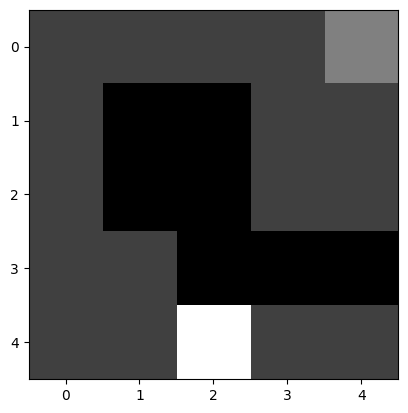

[0. 0.]
[0. 0.]
[4 2 0 0]


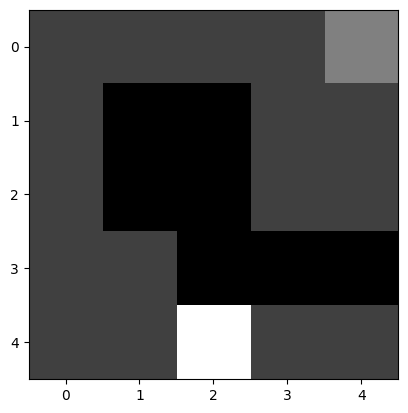

[0 0]
[0 0]
[4 2 0 0]


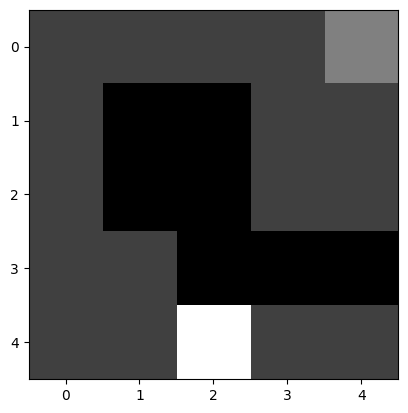

[0. 0.]
[0. 0.]
[4 2 0 0]


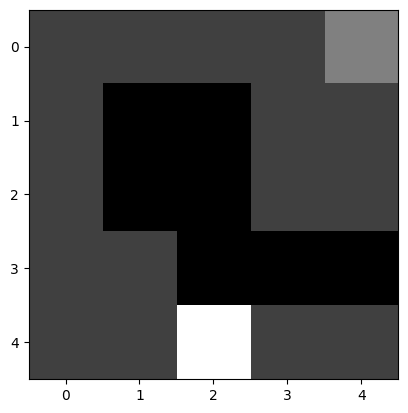

[ 0 -1]
[ 0 -1]
[4 2 0 0]


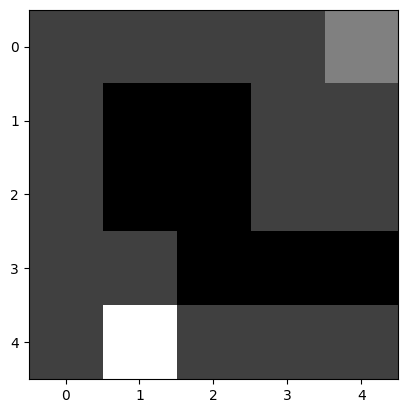

[0. 0.]
[0. 0.]
[ 4  1  0 -1]


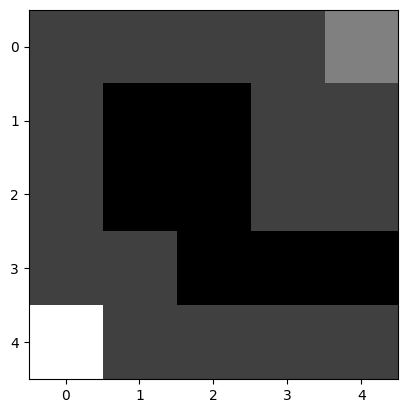

[0. 0.]
[0. 0.]
[ 4  0  0 -1]


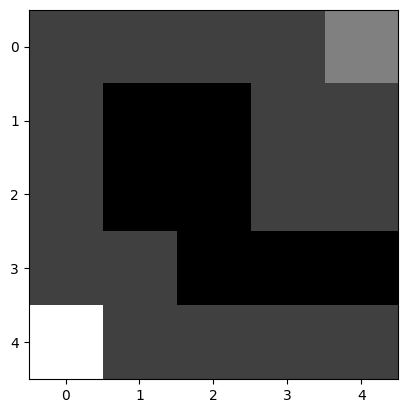

[0. 0.]
[0. 0.]
[4 0 0 0]


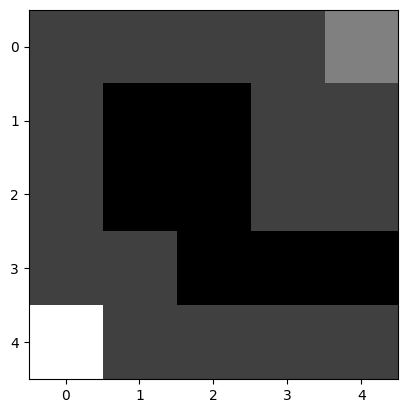

[0. 0.]
[0. 0.]
[4 0 0 0]


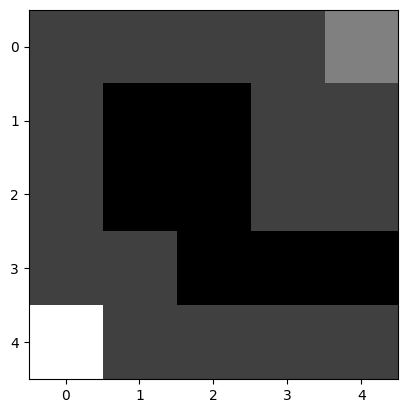

[0. 0.]
[0. 0.]
[4 0 0 0]


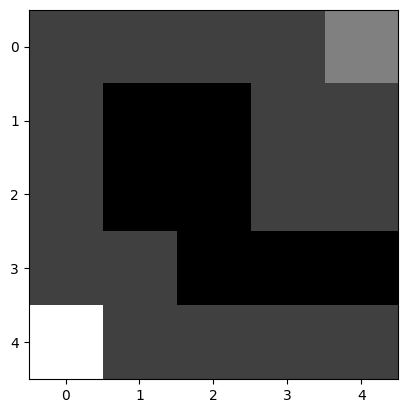

[0 1]
[0 1]
[4 0 0 0]


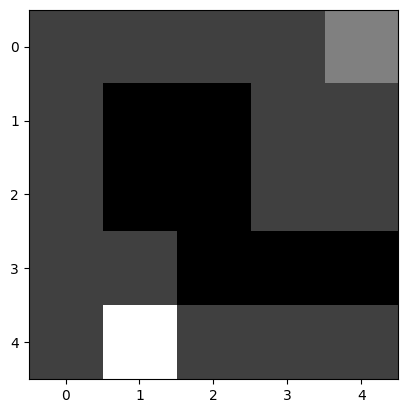

[0. 0.]
[0. 0.]
[4 1 0 1]


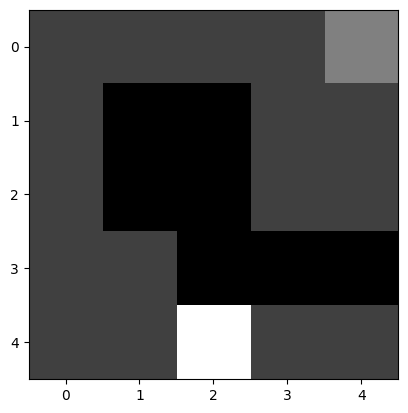

[-1  0]
[-1  0]
[4 2 0 1]


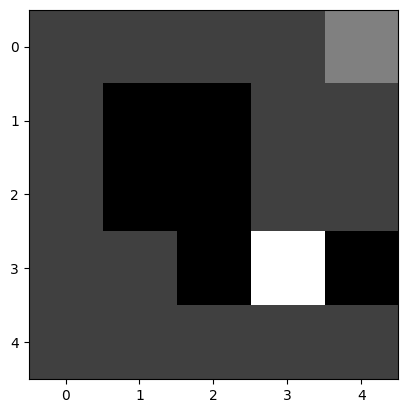

episode:  1
[[0 0 0]
 [0 0 0]]
[[0 0 0]
 [0 0 0]]
[4 1 0 0]


ValueError: setting an array element with a sequence.

In [5]:
# run the monte carlo method
car_race = race(grid)

car_race.train(1000)